# Loan Prediction of Default.

In [1]:
#Importing the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing the dataset 

df=pd.read_csv('loan_data.csv')
df.head()

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Checking the presence of missing values

df.isna().sum()

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 74, dtype: int64

In [4]:
#Removing the columns with >50% missing values and also id,member id and url as these are not required for the analysis

df.drop(columns=['tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util','inq_fi', 'total_cu_tl',
       'inq_last_12m','annual_inc_joint', 'dti_joint', 'verification_status_joint','mths_since_last_major_derog','mths_since_last_record','next_pymnt_d','mths_since_last_delinq','desc','total_rev_hi_lim','id','member_id','url'],axis=1,inplace=True)

In [5]:
#Removing all the other rows with missing values present

df=df.dropna()

In [6]:
#Information about the remaining columns of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437710 entries, 1 to 466283
Data columns (total 46 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   437710 non-null  int64  
 1   funded_amnt                 437710 non-null  int64  
 2   funded_amnt_inv             437710 non-null  float64
 3   term                        437710 non-null  object 
 4   int_rate                    437710 non-null  float64
 5   installment                 437710 non-null  float64
 6   grade                       437710 non-null  object 
 7   sub_grade                   437710 non-null  object 
 8   emp_title                   437710 non-null  object 
 9   emp_length                  437710 non-null  object 
 10  home_ownership              437710 non-null  object 
 11  annual_inc                  437710 non-null  float64
 12  verification_status         437710 non-null  object 
 13  issue_d       

In [7]:
#Checking the unique categories in target variable.

df['loan_status'].unique()

array(['Charged Off', 'Fully Paid', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

The categories can be classified into good loans and bad loans.So the good loans are mapped as 0.Whereas the bad loans/the loans having a chance of default are mapped as 1.Thus making the target variable binary.

In [8]:
df['loan_status']=df['loan_status'].map({'Charged Off':1, 'Fully Paid':0, 'Current':0, 'Default':1,'Late (31-120 days)':1, 'In Grace Period':1, 'Late (16-30 days)':1,'Does not meet the credit policy. Status:Fully Paid':0,'Does not meet the credit policy. Status:Charged Off':1})
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,16.97,0.00,0.00,Jan-15,357.48,Jan-15,0.0,1,INDIVIDUAL,0.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,...,0.00,0.00,0.00,Jan-16,67.79,Jan-16,0.0,1,INDIVIDUAL,0.0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,0.00,0.00,0.00,Jan-15,161.03,Sep-15,0.0,1,INDIVIDUAL,0.0
6,7000,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,...,0.00,0.00,0.00,Jan-16,170.08,Jan-16,0.0,1,INDIVIDUAL,0.0


In [9]:
#Separating out the months from the column term.

df['term_in_months']=df['term'].str.split('months').str[0]

In [10]:
#Removing the term column as it is of no more need.

df.drop(columns=['term'],axis=1,inplace=True)

In [11]:
#Converting the datatype from string to integer.

df = df.astype({"term_in_months": np.dtype("int64")})

<AxesSubplot:xlabel='term_in_months', ylabel='count'>

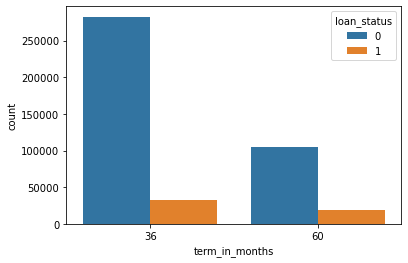

In [12]:
sns.countplot(x='term_in_months',data=df,hue='loan_status')

We can see that the loans are either for a period of 36 or 60 months.The loans which were taken for a period of 36 months has a greater percentage of default than 60 months.

<AxesSubplot:xlabel='grade', ylabel='count'>

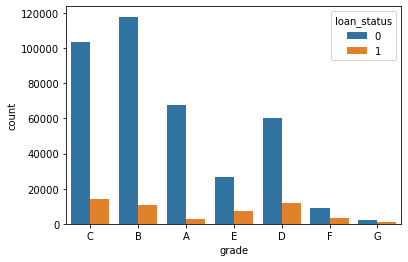

In [13]:
sns.countplot(x='grade',data=df,hue='loan_status')

We can see that C and D LC assigned grade loans have greater chances of default than the other grades.G grade has the lowest chance.

In [14]:
#Label encoding the grade categorical variable.

df['grade']=df['grade'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7})

In [15]:
#Sub-grade is a subset of the grade column.So we can drop it off for the analysis.

df.drop(columns=['sub_grade'],axis=1,inplace=True)

In [16]:
for year in df.emp_length.unique():
    print(f"{year} years in this position:")
    print(f"{df[df.emp_length == year].loan_status.value_counts(normalize=True)}")

< 1 year years in this position:
0    0.873653
1    0.126347
Name: loan_status, dtype: float64
10+ years years in this position:
0    0.892509
1    0.107491
Name: loan_status, dtype: float64
1 year years in this position:
0    0.880489
1    0.119511
Name: loan_status, dtype: float64
3 years years in this position:
0    0.881514
1    0.118486
Name: loan_status, dtype: float64
8 years years in this position:
0    0.881603
1    0.118397
Name: loan_status, dtype: float64
9 years years in this position:
0    0.877627
1    0.122373
Name: loan_status, dtype: float64
5 years years in this position:
0    0.878316
1    0.121684
Name: loan_status, dtype: float64
4 years years in this position:
0    0.883627
1    0.116373
Name: loan_status, dtype: float64
6 years years in this position:
0    0.874655
1    0.125345
Name: loan_status, dtype: float64
2 years years in this position:
0    0.88217
1    0.11783
Name: loan_status, dtype: float64
7 years years in this position:
0    0.880359
1    0.119641


We can see that whatever be the length of the employment, there is no such significant difference in the chances of the loans getting defaulted.

In [17]:
#Removing the column because it is of no such significance.

df.drop(columns=['emp_length'],axis=1,inplace=True)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

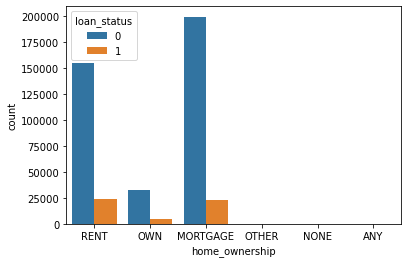

In [18]:
sns.countplot(x='home_ownership',data=df,hue='loan_status')

We can see that the home ownership status of the borrowers were rent,own and mortgage.Rent and mortgage ownership borrowers had high chances of their loans getting defaulted.

<AxesSubplot:xlabel='initial_list_status', ylabel='count'>

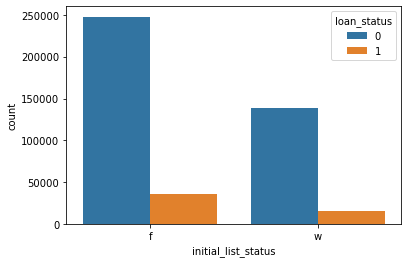

In [19]:
sns.countplot(x='initial_list_status',data=df,hue='loan_status')

If the initial list status of the loans are f then there are greater chances of default than w.

In [20]:
#Unique categories for the purposes for which the loan was taken

df['purpose'].value_counts()

debt_consolidation    259632
credit_card            97508
home_improvement       24389
other                  21773
major_purchase          9162
small_business          5842
car                     5051
medical                 4243
moving                  2765
vacation                2289
wedding                 2253
house                   2112
educational              374
renewable_energy         317
Name: purpose, dtype: int64

It can be seen that most of the loans were taken for the purposes of debt consolidation and credit card.

In [22]:
#There are many job titles of the borrowers.Including it means data leakage.So dropping it off.

df.drop(columns=['emp_title'],axis=1,inplace=True)

In [23]:
#It is a subset of the emp title column so droping it off too.

df.drop(columns=['title'],axis=1,inplace=True)

<AxesSubplot:xlabel='application_type', ylabel='count'>

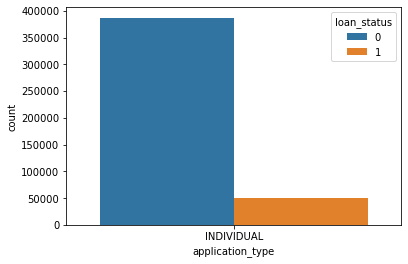

In [24]:
sns.countplot(x='application_type',data=df,hue='loan_status')

We can see that all the loan applications are individual types.

<AxesSubplot:xlabel='verification_status', ylabel='count'>

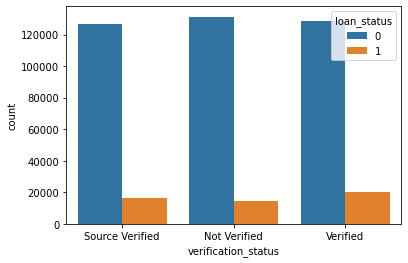

In [25]:
sns.countplot(x='verification_status',data=df,hue='loan_status')

The verification status of the loans are of three types.The verified status of the loans have a higher chances of default.

<AxesSubplot:xlabel='pymnt_plan', ylabel='count'>

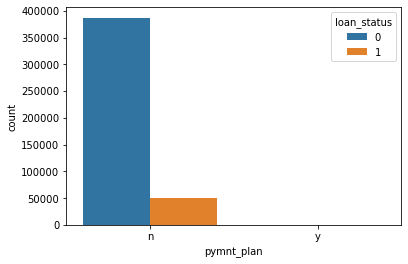

In [26]:
sns.countplot(x='pymnt_plan',data=df,hue='loan_status')

We can see that there were no payment plans for the loans.

In [27]:
#Mapping the variable.

df['pymnt_plan']=df['pymnt_plan'].map({'n':0,'y':1})

<AxesSubplot:title={'center':'int_rate'}, xlabel='loan_status'>

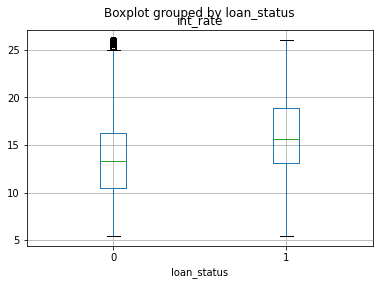

In [29]:
df.boxplot(column='int_rate',by='loan_status')

Higher rates caused greater chances of the loans to default.

<AxesSubplot:xlabel='annual_inc', ylabel='Count'>

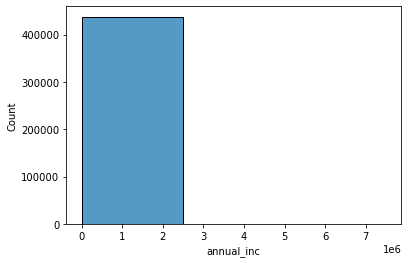

In [30]:
sns.histplot(df['annual_inc'],bins=3)

The annual incomes of the borrowers were limited to 2.5-2.6 lakhs.

<AxesSubplot:xlabel='open_acc', ylabel='Count'>

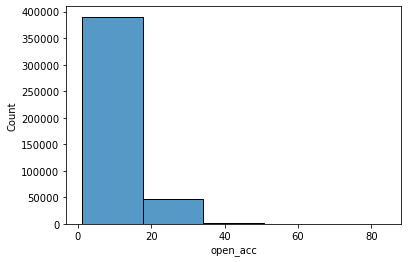

In [31]:
sns.histplot(x='open_acc',data=df,bins=5)

The number of open credit lines in the borrowers credit lines were maximum in the range of 2-18

<AxesSubplot:xlabel='pub_rec', ylabel='Count'>

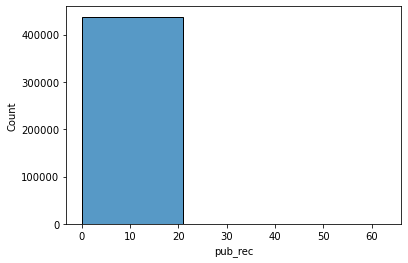

In [32]:
sns.histplot(x='pub_rec',data=df,bins=3)

The number of derogatory public records were in the range of 0-22 for the borrowers.

In [33]:
df['addr_state'].nunique()

50

There are 50 states frm where the borrowers are.

([<matplotlib.patches.Wedge at 0x23c874073a0>,
 [Text(0.46712198661518595, 0.995890079085379, 'CA'),
  Text(-1.0684154975382014, 0.26170274094895823, 'NY'),
  Text(-0.6127461229995189, -0.9135328066079831, 'TX'),
  Text(0.513000058890637, -0.9730523827514134, 'FL'),
  Text(1.052022686398436, -0.3213226840778881, 'IL')],
 [Text(0.2547938108810105, 0.5432127704102067, '36.04%'),
  Text(-0.5827720895662917, 0.14274694960852266, '20.27%'),
  Text(-0.33422515799973757, -0.49829062178617256, '18.57%'),
  Text(0.27981821394034745, -0.5307558451371345, '15.68%'),
  Text(0.5738305562173287, -0.17526691858793897, '9.44%')])

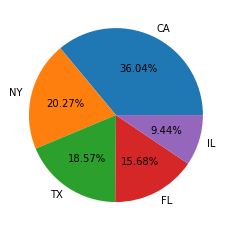

In [34]:
addrnames=df.addr_state.value_counts().index
addrval=df.addr_state.value_counts().values
plt.pie(addrval[:5],labels=addrnames[:5],autopct='%1.2f%%')

Top 5 states from where the borrowers are.

In [35]:
df.drop(columns=['last_pymnt_d','last_credit_pull_d','earliest_cr_line','addr_state','zip_code','issue_d'],axis=1,inplace=True)

Dropping off the dates and the state and zipcode column because they are of no significance when we are predicting the probability of default.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437710 entries, 1 to 466283
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   437710 non-null  int64  
 1   funded_amnt                 437710 non-null  int64  
 2   funded_amnt_inv             437710 non-null  float64
 3   int_rate                    437710 non-null  float64
 4   installment                 437710 non-null  float64
 5   grade                       437710 non-null  int64  
 6   home_ownership              437710 non-null  object 
 7   annual_inc                  437710 non-null  float64
 8   verification_status         437710 non-null  object 
 9   loan_status                 437710 non-null  int64  
 10  pymnt_plan                  437710 non-null  int64  
 11  purpose                     437710 non-null  object 
 12  dti                         437710 non-null  float64
 13  delinq_2yrs   

In [37]:
#Removing the application type column because it is only of one type.No such significant effect.

df.drop(columns=['application_type'],axis=1,inplace=True)

In [38]:
df['loan_status'].value_counts()

0    386872
1     50838
Name: loan_status, dtype: int64

Clearly we can see that the dataset is imbalanced.Hence using pycaret library as it works well with imbalanced datasets.

In [39]:
import pycaret

In [40]:
#Scaling the data as well as selecting the important features and also fixing the imbalance of the dataset.

from pycaret.classification import *
clfi=setup(data=df,target='loan_status',normalize=True,feature_selection=True,fix_imbalance=True)

,Description,Value
0,session_id,4752
1,Target,loan_status
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(437710, 35)"
5,Missing Values,False
6,Numeric Features,26
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


In [42]:
best=compare_models(['rf','lr','xgboost','dt','svm','nb'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9757,0.9673,0.7990,0.9882,0.8836,0.8702,0.8763,236.8460
rf,Random Forest Classifier,0.9734,0.9635,0.7894,0.9755,0.8726,0.8579,0.8640,422.2370
svm,SVM - Linear Kernel,0.9676,0.0000,0.7933,0.9147,0.8496,0.8315,0.8342,56.3150
lr,Logistic Regression,0.9612,0.9594,0.8094,0.8481,0.8283,0.8064,0.8067,98.2700
dt,Decision Tree Classifier,0.9442,0.8889,0.8169,0.7315,0.7718,0.7401,0.7416,63.4400
nb,Naive Bayes,0.9264,0.8833,0.5048,0.7810,0.6131,0.5744,0.5913,56.1970


We can see that xgboost model works best for the dataset.We cant take accuracy as the required metric so we consider f1 score kappa score precision and recall .Considering the scores,we can use the xgboost model.We can also check if we can increase the figures of the metrics by selecting some more features which i have not considered or by hyopertuning.The AUC score is also high for the xgboost model.

We can also assign credit scores to the borrowers on the basis of the dates they are paying the loans rom the date of borrow.We can also assign it on the basis of the loan status, which is the target variable as i had categoried it into bad loans and good loans where i had considered the bad loans to default.